**High-level features**

So far, we saw machine learning algorithms that work with sets of features i.e. the features have no structure or order. Hence, we cannot change their accuracy by shuffling the columns in the feature matrix X. However, working with images is more difficult because there is a spatial relationship between the pixels of an image. The location of each pixel in the (height, width) grid is essential, and it would be difficult to recognize an image after shuffling its pixels.

One solution is to extract a set of high-level features from the images and use them as the inputs to our machine learning algorithms. For instance, later in this course, we will learn about convolution neural networks (CNN) which automatically extract them. Here are a few examples of high-level features.

* Are there rounded objects in the image?
* Type of environment? e.g., indoor, outdoor, sea, forest, clearing
* Presence of specific objects such as wings, wheels, eyes, legs

In this subject and the next one, we will work on the raw pixels directly, i.e., not with high-level features. But later in this course, we will try to improve our classifiers using these neural network algorithms.

**Create feature matrix**
Let’s see how to transform our 2- and 3-dimensional arrays of pixels into an input matrix X that we can use in our machine learning tasks. We will start by loading the first image from the cifar-images.zip archive.

We can use the code from the previous unit.

In [2]:
from PIL import Image
import numpy as np

# Load the image
pillow_img = Image.open('c4_cifar-1.png')

# Convert it into a Numpy array
img = np.array(pillow_img)

# Print shape
print('Shape:', img.shape) # (32, 32, 3)

Shape: (32, 32, 3)


We load the image using the open() function and convert it into a Numpy array of shape (32, 32, 3), i.e., a 32 by 32 image with three color channels. Again, we cannot work on this array directly, but we can flatten it into a vector of 32*32*3=3072 values.

In [3]:
# Flatten the array
flat_img = img.flatten()

# Print shape
print('Shape:', flat_img.shape) # (3072,)

Shape: (3072,)


In this code, the flatten() function reads each value from the img 3-dimensional array and stores them into a 1-dimensional vector. It follows a well-defined order when reading the array. Hence, the pixels are still ordered, but in a single dimension. Later in this unit, we will see how to recover the original image using the Numpy reshape() function.

The idea is to flatten all images from our dataset and use these vectors of pixels as the rows of the input matrix X.

In [4]:
# Five images from the CIFAR-10 dataset
files = [
    'c4_cifar-1.png',
    'c4_cifar-2.png',
    'c4_cifar-3.png',
    'c4_cifar-4.png',
    'c4_cifar-5.png'
]

# Feature matrix
features = []

for file in files:
    # Load the image
    pillow_img = Image.open(file)

    # Convert it into a Numpy array
    img = np.array(pillow_img)

    # Flatten the array
    flat_img = img.flatten()

    # Add it to the feature matrix
    features.append(flat_img)

In this code, we create the “flat” vector of pixels for each image and add them to a feature variable. We can then transform this list of five (3072,) vectors into a two-dimensional array of shape (5, 3072) using the array() function from Numpy.

In [5]:
# Create input matrix
X = np.array(features)

# Print shape
print('shape:', X.shape) # (5, 3072)

# Print data type
print('dtype:', X.dtype) # uint8

shape: (5, 3072)
dtype: uint8


We now have a feature matrix X containing our five images. However, its data type (uint8) can cause issues with some Scikit-learn objects that work with floating point numbers. For instance, the StandardScaler object raises a DataConversionWarning when applying standardization.

In [6]:
from sklearn.preprocessing import StandardScaler

StandardScaler().fit_transform(X)

array([[ 0.73671505,  0.59622324,  0.98559361, ..., -0.57902805,
        -0.73675288,  0.11136219],
       [ 0.52892363, -0.62119594, -0.39995103, ...,  1.59731875,
        -1.21829071, -1.36539731],
       [-1.94568335, -1.66692779, -1.28555688, ..., -0.01996648,
         0.78009128,  0.49870895],
       [ 0.05667039,  0.68987087,  1.34269274, ..., -1.39765391,
        -0.32744572,  1.51549418],
       [ 0.62337428,  1.00202963, -0.64277844, ...,  0.39932969,
         1.50239803, -0.76016801]])

Scikit-learn simply tells us that the data in X was converted to type float since standardization resulted in floating point numbers. **To avoid this warning, we can convert our input matrix using the astype() function.**



In [8]:
print('dtype:', X.dtype)

dtype: uint8


In [9]:
# Convert to float
X = X.astype(np.float)

# Print the new data type
print('dtype:', X.dtype)


dtype: float64


As you can see, we didn’t specify the precision of the floating point numbers for the conversion. It seems that Python used float64 which means that each value takes 8 bytes of memory (64 bits). You might use other values such as float16 or float32 which are less precise but also take less memory.

It’s always interesting to track the amount of memory. For large datasets, you might want to decrease the precision of your values by changing the data type, e.g., from float64 to float16.

Now, let’s see how to recover the images from the X array.

**Plot images from feature matrix**

Many datasets (e.g., MNIST, CIFAR-10) provide the set of images as a feature matrix X where rows correspond to the “flat” vectors of pixels from above. In this case, we need to convert these rows back into 2- or 3-dimensional arrays to plot the images. Let’s see how to do that. We will try to recover the third image from our dataset.

First, we need to extract the flat vector of pixels.

In [10]:
# Extract the third image
flat_img = X[2, :] # third row

print('shape:', flat_img.shape) 

shape: (3072,)


We can now reshape this flat_img vector into a 3-dimensional array using the reshape() function. You can think of it as the inverse of the flatten() operation.



In [11]:
# Reshape the image
img = flat_img.reshape(32, 32, 3)

# Print shape
print('shape:', img.shape)

shape: (32, 32, 3)


Finally, we can plot the img array using the Pyplot imshow() function:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


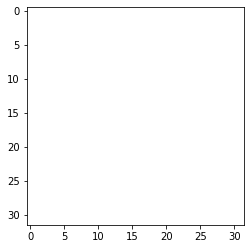

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the image
plt.imshow(img)
plt.show()

The imshow() function expects arrays with values between 0 and 255 when the data type is uint8, but values between 0 and 1 when they are floating point numbers, so we get a warning saying that Pyplot is clipping the input data into a valid range and we get a white image

**To solve the issue, we can simply divide the pixel values by 255 to normalize them between 0 and 1**

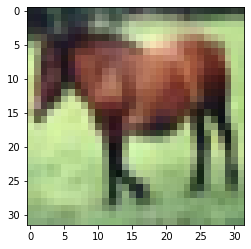

In [13]:
# Plot the rescaled image
plt.imshow(img/255)
plt.show()

or change the data type to integer np.int (or np.uint8)



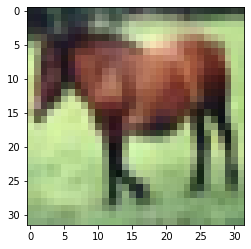

In [15]:
# Plot image
plt.imshow(img.astype(np.uint8))
plt.show()